<a href="https://colab.research.google.com/github/jeosol/aiml/blob/main/fashion_mnist_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Several DL concepts applied to the MNIST datasetth

In [ ]:
%tensorflow_version 2.x

In [ ]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as df
import matplotlib.pyplot as plt

**Load the MNIST data using keras API**

In [5]:
fashion_mnist = keras.datasets.fashion_mnist


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
# Normalize the data so we get good performance with gradient descent algorithm
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Simple **setup**

In [32]:
# Create the model and add the layers 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [35]:
# run the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), verbose=0)

In [36]:
# plot the training and validation accuracy and loss
import pandas as pd
df = pd.DataFrame(history.history)

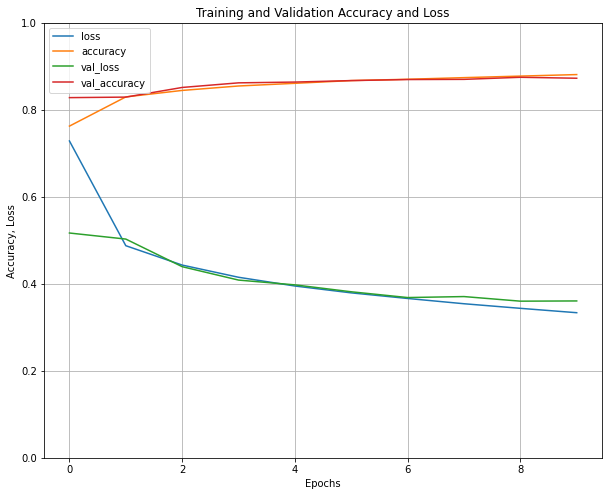

In [37]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,8))
plt.title('Training and Validation Accuracy and Loss')
plt.ylim([0, 1.])
plt.xlabel('Epochs')
plt.ylabel('Accuracy, Loss')
plt.grid(True)
